**Course-End Project: Automating Port Operations**

    Project Statement:
    Marina Pier Inc. is leveraging technology to automate their operations on the San Francisco port.
    The company’s management has set out to build a bias-free/ corruption-free automatic system that reports & avoids faulty situations caused by human error. Examples of human error            include misclassifying the correct type of boat. The type of boat that enters the port region is as follows.
        ●	Buoy
        ●	Cruise_ship
        ●	Ferry_boat
        ●	Freight_boar
        ●	Gondola
        ●	Inflatable_boat
        ●	Kayak
        ●	Paper_boat
        ●	Sailboat
    Marina Pier wants to use Deep Learning techniques to build an automatic reporting system that recognizes the boat. The company is also looking to use a transfer learning approach of any     lightweight pre-trained model in order to deploy in mobile devices.
    As a deep learning engineer, your task is to:
        1.	Build a CNN network to classify the boat.
        2.	Build a lightweight model with the aim of deploying the solution on a mobile device using transfer learning. You can use any lightweight pre-trained model as
            the initial (first) layer. MobileNetV2 is a popular lightweight pre-trained model built using Keras API.


**1.	Build a CNN network to classify the boat.**



**1.1. Split the dataset into train and test in the ratio 80:20, with shuffle and random state=43.**

In [44]:
#import the packages
import os
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers, metrics
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [45]:

# Set path to dataset
data_dir = './sample_data/Automating Port Operations_Dataset/boat_type_classification_dataset'  # ← replace with actual path
image_size = (224, 224)  # Resize images to this shape
batch_size = 32
seed = 43  # For reproducibility

In [46]:


#Load Datasets using tf.keras.preprocessing.image_dataset_from_directory

# Load train dataset (70%)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',  # For multi-class classification
    validation_split=0.2,  # 80:20 split
    subset='training',  # Subset for training
    seed=seed,  # Set seed for reproducibility
    shuffle=True  # Ensure shuffling of the dataset
)
# Load test dataset (30%)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    validation_split=0.2,  # 80:20 split
    subset='validation',  # Subset for validation
    seed=seed,  # Set seed for reproducibility
    shuffle=True  # Ensure shuffling of the validation dataset
)



#getting class names
class_names = train_dataset.class_names
print(class_names)


Found 1162 files belonging to 9 classes.
Using 930 files for training.
Found 1162 files belonging to 9 classes.
Using 232 files for validation.
['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


**1.2. Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets. This function also
supports data normalization.**

**1.3. Load train, validation and test dataset in batches of 32 using the function initialized in the above step.**

In [47]:


# Normalize pixel values (rescale to 0-1 range) Normalize the dataset using image_scale=1./255
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


**1.3. Load train, validation and test dataset in batches of 32 using the function initialized in the above step.**

**1.4.	Build a CNN network using Keras with the following layers**

        •	Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D
        •	Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D
        •	GLobalAveragePooling2D layer
        •	Dense layer with 128 neurons and activation relu
        •	Dense layer with 128 neurons and activation relu
        •	Dense layer with 9 neurons and activation softmax.


In [48]:

#CNN Model
num_classes = 9  # 9 boat types

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),

    layers.Dense(num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,041 (125.16 KB)

 Trainable params: 32,041 (125.16 KB)

 Non-trainable params: 0 (0.00 B)

**1.5. Compile the model with Adam optimizer, categorical_crossentropy loss, and with metrics accuracy, precision, and recall.**

In [49]:


model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')
    ]
)


**1.6. Train the model for 20 epochs and plot training loss and accuracy against epochs.**

In [50]:

# Train the model

history = model.fit(train_dataset,validation_data=test_dataset, epochs=20)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.3002 - loss: 2.0175 - precision: 0.3859 - recall: 0.0228 - val_accuracy: 0.3017 - val_loss: 1.8232 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.3399 - loss: 1.7883 - precision: 0.4313 - recall: 0.0066 - val_accuracy: 0.3017 - val_loss: 1.8130 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.3513 - loss: 1.8008 - precision: 0.6803 - recall: 0.0083 - val_accuracy: 0.3017 - val_loss: 1.7800 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.3492 - loss: 1.7378 - precision: 0.6501 - recall: 0.0250 - val_accuracy: 0.3017 - val_loss: 1.7700 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.3501 - loss: 1.7235 - precision: 0.5242 - recall: 0.0114 - val_accuracy:

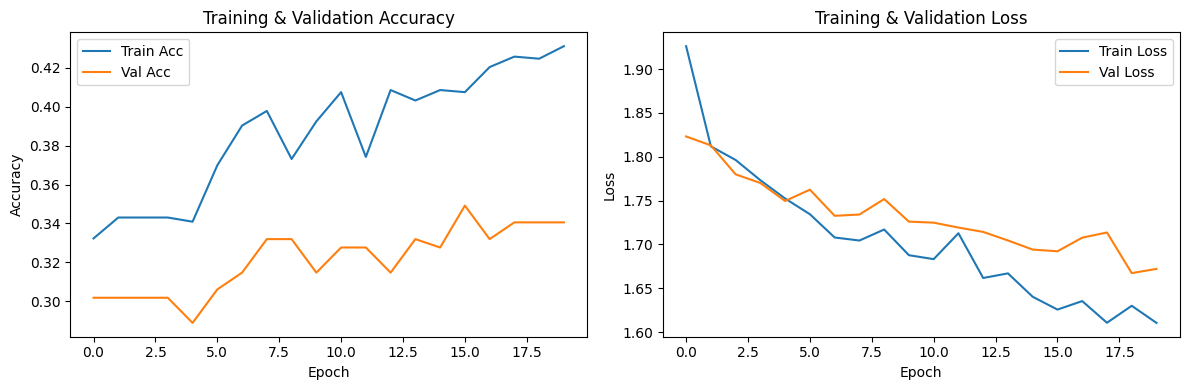

In [51]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**1.7. Evaluate the model on test images and print the test loss and accuracy.**


In [52]:
# Evaluate the model
cnn_test_loss, cnn_test_accuracy, cnn_test_precision, cnn_test_recall = model.evaluate(test_dataset)

print(f"\nTest Loss: {cnn_test_loss:.4f}")
print(f"Test Accuracy: {cnn_test_accuracy:.4f}")
print(f"Test Precision: {cnn_test_precision:.4f}")
print(f"Test Recall: {cnn_test_recall:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 446ms/step - accuracy: 0.3782 - loss: 1.6239 - precision: 0.5470 - recall: 0.1326

Test Loss: 1.6721
Test Accuracy: 0.3405
Test Precision: 0.5283
Test Recall: 0.1207


**1.8. Plot heatmap of the confusion matrix and print classification report.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


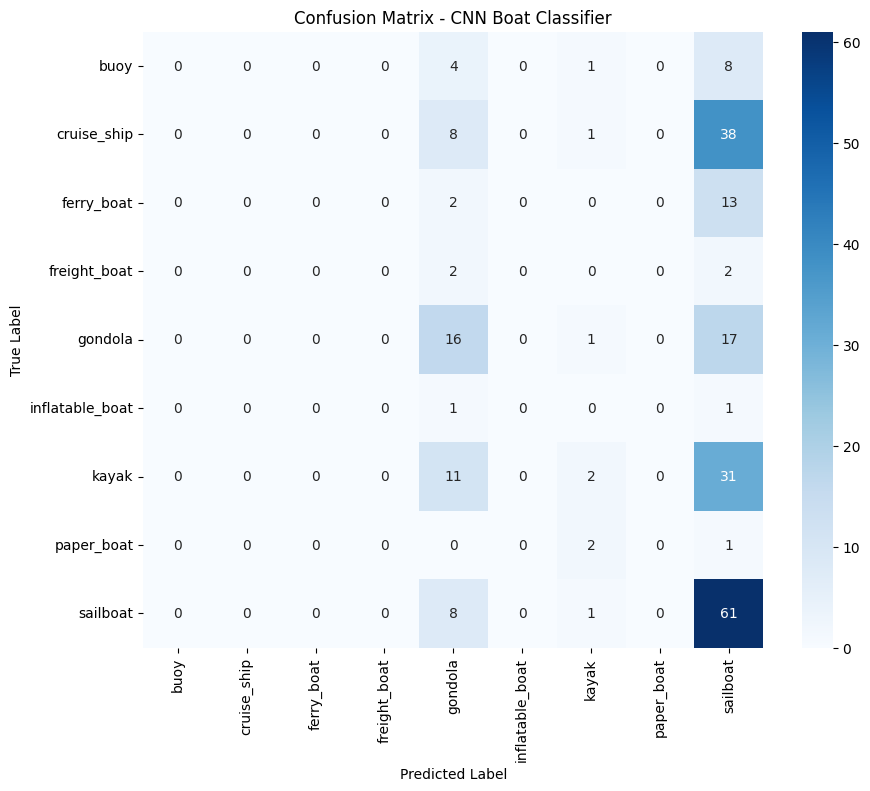

In [53]:


# Step 1: Collect true labels and predicted labels
y_true = []
y_pred = []

for images, labels in test_dataset:
    # Convert one-hot encoded labels to integers if necessary
    if labels.shape[-1] == 9:
        labels = tf.argmax(labels, axis=1)
    y_true.extend(labels.numpy())

    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_pred.extend(predicted_labels)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN Boat Classifier')
plt.show()



In [55]:
# Step 1: Get predictions
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 2: Get true labels
y_true = np.concatenate([np.argmax(y, axis=1) for x, y in test_dataset])

# Step 3: Define class labels
labels = list(range(9))
class_names = ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat',
               'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']

# Step 4: Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes, labels=labels, target_names=class_names, zero_division=0))


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 551ms/step
                 precision    recall  f1-score   support

           buoy       0.00      0.00      0.00        13
    cruise_ship       0.00      0.00      0.00        47
     ferry_boat       0.00      0.00      0.00        15
   freight_boat       0.00      0.00      0.00         4
        gondola       0.27      0.41      0.33        34
inflatable_boat       0.00      0.00      0.00         2
          kayak       0.12      0.02      0.04        44
     paper_boat       0.00      0.00      0.00         3
       sailboat       0.33      0.80      0.46        70

       accuracy                           0.31       232
      macro avg       0.08      0.14      0.09       232
   weighted avg       0.16      0.31      0.19       232



**2.	Build a lightweight model with the aim of deploying the solution on a mobile device using transfer learning. You can use
        any lightweight pre-trained model as the initial (first) layer. MobileNetV2 is a popular lightweight pre-trained model built
        using Keras API.**

**2.1. Split the dataset into train and test datasets in the ration 70:30, with shuffle and random state=1.**

In [56]:
seed2 = 1  # For reproducibility

train_ds_tl = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',  # For multi-class classification
    validation_split=0.3,  # 80:20 split
    subset='training',  # Subset for training
    seed=seed2,  # Set seed for reproducibility
    shuffle=True  # Ensure shuffling of the dataset
)
# Load test dataset (30%)
test_ds_tl = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    validation_split=0.3,  # 80:20 split
    subset='validation',  # Subset for validation
    seed=seed2,  # Set seed for reproducibility
    shuffle=True  # Ensure shuffling of the validation dataset
)


Found 1162 files belonging to 9 classes.
Using 814 files for training.
Found 1162 files belonging to 9 classes.
Using 348 files for validation.


In [57]:

#class counts

class_counts = {folder: len(os.listdir(os.path.join(data_dir, folder)))
                for folder in os.listdir(data_dir)}

print("Class distribution:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")



Class distribution:
inflatable_boat: 16
freight_boat: 23
cruise_ship: 191
gondola: 193
kayak: 203
buoy: 53
paper_boat: 31
sailboat: 389
ferry_boat: 63


**2.2. Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets. This function also supports data normalization.(Hint: Image_scale=1./255).**

**2.3. Load train, validation and test datasets in batches of 32 using the function initialized in the above step.**

In [58]:
# Normalize pixel values to [0, 1] range using Rescaling layer
normalization_layer_tl = tf.keras.layers.Rescaling(1./255)


train_ds_tl = train_ds_tl.map(lambda x, y: (normalization_layer_tl(x), y))
test_ds_tl = test_ds_tl.map(lambda x, y: (normalization_layer_tl(x), y))


**2.4.	Build a CNN network using Keras with the following layers.**

            •	Load MobileNetV2 - Light Model as the first layer
                (Hint: Keras API Doc)
            •	GLobalAveragePooling2D layer
            •	Dropout(0.2)
            •	Dense layer with 256 neurons and activation relu
            •	BatchNormalization layer
            •	Dropout(0.1)
            •	Dense layer with 128 neurons and activation relu
            •	BatchNormalization layer
            •	Dropout(0.1)
            •	Dense layer with 9 neurons and activation softmax


In [59]:


# Load MobileNetV2 as the base model (without the top classification layer)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model to retain pre-trained weights
base_model.trainable = False

# Build the model
model_tl = models.Sequential([
    base_model,  # MobileNetV2 as the first layer
    layers.GlobalAveragePooling2D(),  # Pooling layer
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.BatchNormalization(),  # BatchNormalization
    layers.Dropout(0.1),  # Dropout for regularization
    layers.Dense(128, activation='relu'),  # Another Dense layer
    layers.BatchNormalization(),  # BatchNormalization
    layers.Dropout(0.1),  # Dropout for regularization
    layers.Dense(9, activation='softmax')  # Output layer with 9 neurons (boat classes)
])

# Display model summary
model_tl.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621,513 (10.00 MB)

 Trainable params: 362,761 (1.38 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

**2.5. Compile the model with Adam optimizer, categorical_crossentropy loss, and metrics accuracy, Precision, and Recall.**

In [60]:


# Compile the model
model_tl.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


In [ ]:
2.6. Train the model for 50 epochs and Early stopping while monitoring validation loss.

In [61]:


# Set up EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_tl = model_tl.fit(
    train_ds_tl,
    validation_data=test_ds_tl,
    epochs=50,
    callbacks=[early_stop]
)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.4254 - loss: 1.8143 - precision_2: 0.5787 - recall_2: 0.3395 - val_accuracy: 0.8017 - val_loss: 0.7255 - val_precision_2: 0.9129 - val_recall_2: 0.6925
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8781 - loss: 0.4023 - precision_2: 0.9162 - recall_2: 0.8401 - val_accuracy: 0.8190 - val_loss: 0.5942 - val_precision_2: 0.9268 - val_recall_2: 0.7644
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9136 - loss: 0.2897 - precision_2: 0.9553 - recall_2: 0.8703 - val_accuracy: 0.8218 - val_loss: 0.5311 - val_precision_2: 0.9070 - val_recall_2: 0.7845
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9455 - loss: 0.1799 - precision_2: 0.9620 - recall_2: 0.9237 - val_accuracy: 0.8477 - val_loss: 0.5085 - val_precision_2: 0.8956 - val_recall_2: 0.8132
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9551 - loss: 0.1543 - precision_2: 0.9742 - recall_2: 0.9366 - val_accur

**2.7. Evaluate the model on test images and print the test loss and accuracy.**

In [62]:
# Evaluate the model on the test data
mobilenet_test_loss, mobilenet_test_accuracy, mobilenet_test_precision, mobilenet_test_recall = model_tl.evaluate(test_ds_tl)

# Print the results
print(f"Test Loss: {mobilenet_test_loss}")
print(f"Test Accuracy: {mobilenet_test_accuracy}")
print(f"Test Precision: {mobilenet_test_precision}")
print(f"Test Recall: {mobilenet_test_recall}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8811 - loss: 0.5070 - precision_2: 0.9054 - recall_2: 0.8359
Test Loss: 0.47680285573005676
Test Accuracy: 0.8764367699623108
Test Precision: 0.920634925365448
Test Recall: 0.8333333134651184


**2.8. Plot Train loss Vs Validation loss and Train accuracy Vs Validation accuracy.**

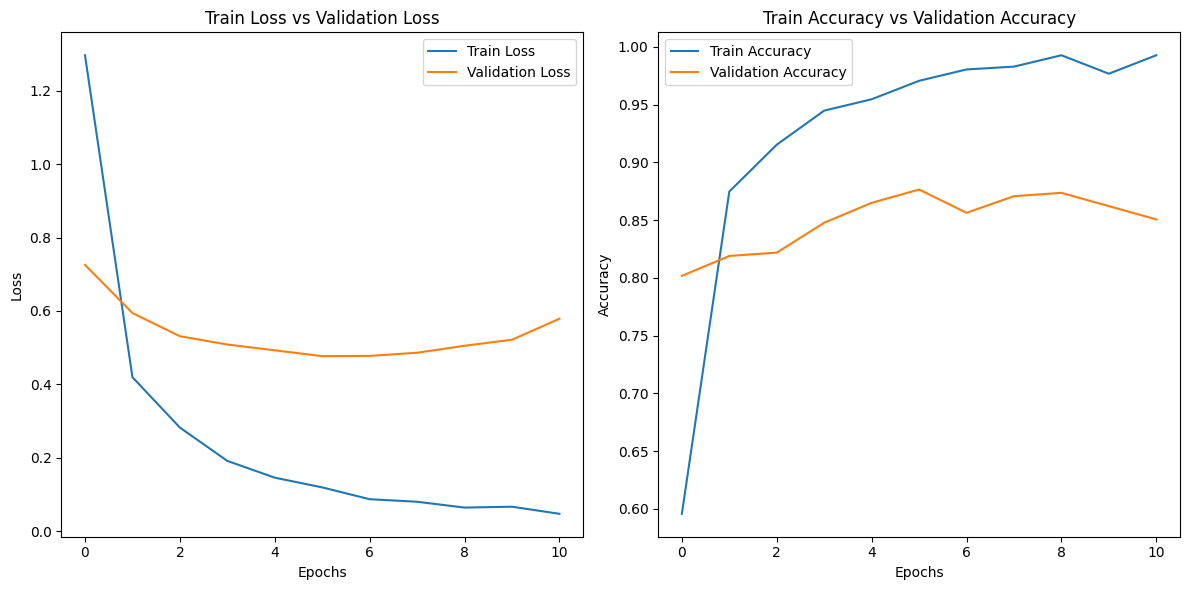

In [63]:


# Plot Train Loss vs Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Train Accuracy vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Predicted class 'buoy': 9 instances
Predicted class 'cruise_ship': 57 instances
Predicted class 'ferry_boat': 13 instances
Predicted class 'freight_boat': 7 instances
Predicted class 'gondola': 57 instances
Predicted class 'inflatable_boat': 1 instances
Predicted class 'kayak': 78 instances
Predicted class 'paper_boat': 7 instances
Predicted class 'sailboat': 119 instances

Transfer Learning Classification Report:
                 precision    recall  f1-score   support

           buoy       1.00      0.64      0.78        14
    cruise_ship       0.93      0.88      0.91        60
     ferry_

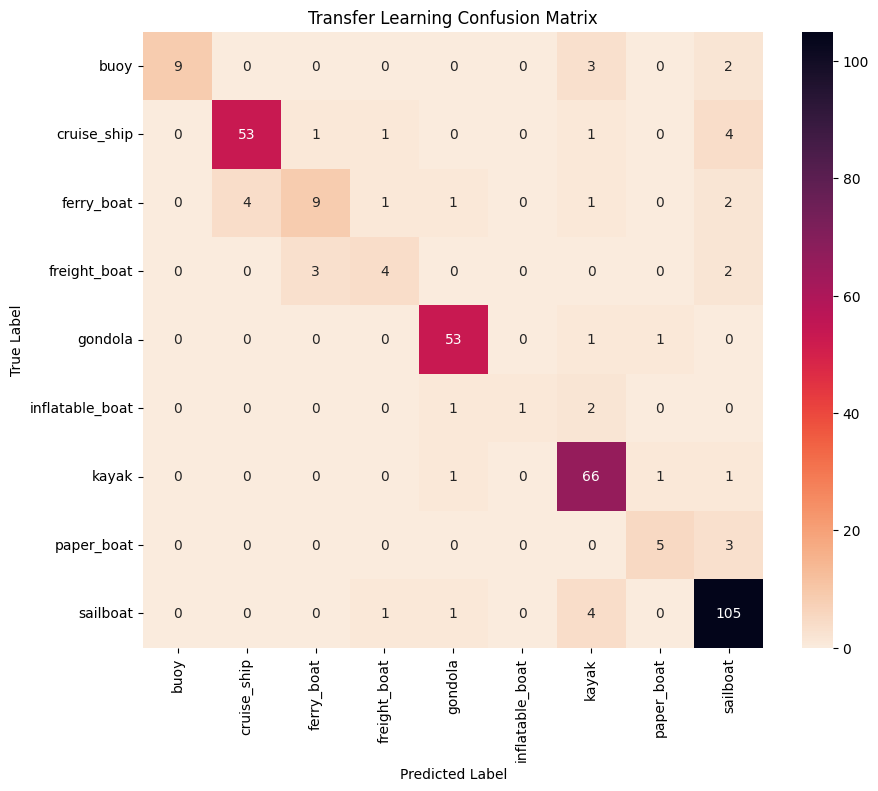

In [66]:


# Assuming you have already loaded your test dataset (test_ds_tl)
# and trained your transfer learning model (model_tl)

# Get all true labels and predictions from the test dataset
y_true_tl = []
y_pred_tl = []

for images, labels in test_ds_tl:
    y_true_tl.extend(np.argmax(labels.numpy(), axis=1)) # Get the class index for true labels
    predictions = model_tl.predict(images)
    y_pred_tl.extend(np.argmax(predictions, axis=1)) # Get the class index for predictions

# Now, y_pred_tl contains the predicted class index for each sample in your test set.
# You can count the occurrences of each predicted class.

predicted_class_counts = np.bincount(y_pred_tl)

# Assuming you have your class names (class_names)
for i, count in enumerate(predicted_class_counts):
    if i < len(class_names):
        print(f"Predicted class '{class_names[i]}': {count} instances")
    else:
        print(f"Predicted class index {i}: {count} instances")
labels = list(range(9))

print("\nTransfer Learning Classification Report:")
print(classification_report(y_true_tl, y_pred_tl,labels=labels, target_names=class_names, zero_division=0))

cm_tl = confusion_matrix(y_true_tl, y_pred_tl)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tl, annot=True, fmt='d', cmap='rocket_r', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Transfer Learning Confusion Matrix')
plt.show()

**3. Compare the results of both models built in steps 1 and 2 and state your observations.**

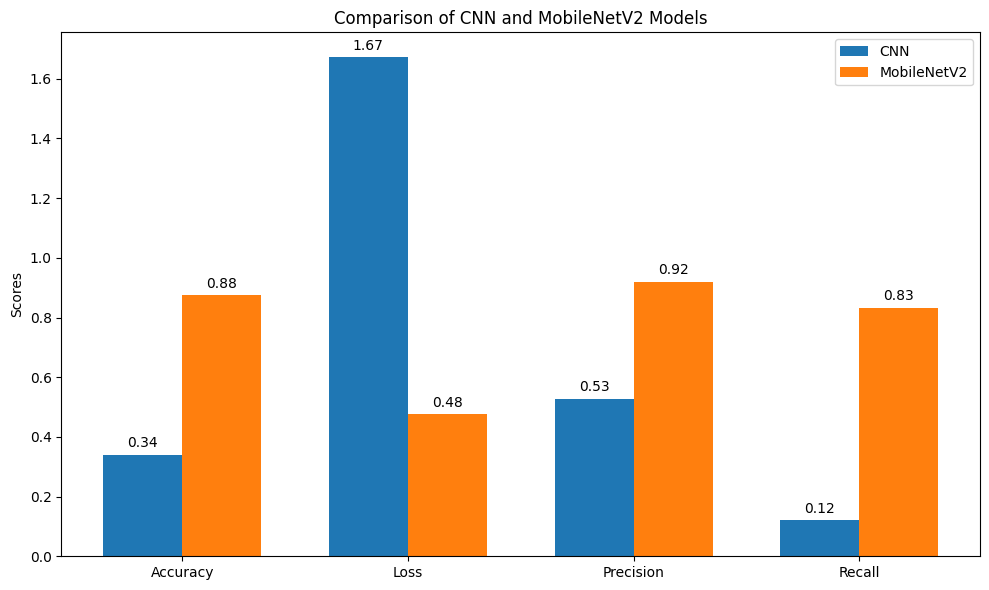

In [65]:


# Metrics for the CNN and MobileNetV2 models
metrics = ['Accuracy', 'Loss', 'Precision', 'Recall']
cnn_metrics = [cnn_test_accuracy, cnn_test_loss, cnn_test_precision, cnn_test_recall]
mobilenet_metrics = [mobilenet_test_accuracy, mobilenet_test_loss, mobilenet_test_precision, mobilenet_test_recall]

# Set positions for the bars
x = np.arange(len(metrics))  # the label locations
width = 0.35  # width of the bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, cnn_metrics, width, label='CNN')
rects2 = ax.bar(x + width/2, mobilenet_metrics, width, label='MobileNetV2')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of CNN and MobileNetV2 Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels on top of each bar
add_labels(rects1)
add_labels(rects2)

fig.tight_layout()
plt.show()


Interpretation:

    MobileNetV2 significantly outperforms the CNN model across all metrics.

    CNN's accuracy (0.34) is quite low, indicating it's struggling to learn the patterns effectively.

    High loss (1.67) in CNN shows poor confidence in its predictions.

    The extremely low recall (0.12) for CNN means it's missing a majority of the actual positive cases.

    In contrast, MobileNetV2 shows excellent generalization with:

    High precision and recall — indicating balanced predictions.

    Lower loss — suggesting more confident predictions.




**Model Comparison Verdict:**

    MobileNetV2 with Transfer Learning clearly outperforms the basic CNN model in all metrics.